# Proyecto final de la plataforma Coderhouse

## Introduccion

La idea del analisis de este dataset es realizar hipotesis y preguntas sobre los datos y encotrar insights al analizar las distintas features de los jugadores.

Ademas se pretende generar modelos que predigan precios de jugadores y posibles jugadores estrella.

El dataset contiene informacion sobre los jugadores de las 5 grandes ligas de europa, desde la temporada 2017-2018 hasta 2019-2020. Contiene informacion sobre las estadisticas de los jugadores en la temporada como posicion, pases, goles, faltas, tarjetas y MUCHO mas. Tambien contiene caracteristicas fisicas como peso, altura, pais de origen, etc. Y por ultimo, tambien contiene el valor de mercado en ese momento

[Link del dataset en kaggle](https://www.kaggle.com/datasets/kriegsmaschine/soccer-players-values-and-their-statistics)

La idea en un inicio es trabajar solo con este dataset, pero es posible que puedan agregarse mas dataset para el analisis

### Objetivos

* Crear un modelo que estime los precios de mercado por jugador
* Un modelo que detecte si un jugador tiene condiciones para jugar en otra posicion aparte de las que ya juega.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import MultipleLocator, FuncFormatter

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Función para convertir los ticks a millones
def millions_formatter(x, pos):
    return f'{x / 1_000_000}M'

# personalizacion de seaborn
sns.set_theme(style='white')
sns.set(rc = {'figure.figsize':(20,6)}, font="Arial", font_scale=1.3, style='whitegrid', context='notebook')

In [2]:
df_1718 = pd.read_csv('./transfermarkt_fbref_201718.csv', delimiter=';', index_col=0, low_memory=False)
df_1819 = pd.read_csv('./transfermarkt_fbref_201819.csv', delimiter=';', index_col=0, low_memory=False)
df_1920 = pd.read_csv('./transfermarkt_fbref_201920.csv', delimiter=';', index_col=0, low_memory=False)

In [3]:
df_1718.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,right,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,right,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,left,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
882,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


In [4]:
df_1920.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2644 entries, 21 to 2615
Columns: 399 entries, player to Season
dtypes: float64(239), int64(151), object(9)
memory usage: 8.1+ MB


In [5]:
df_1920.describe()

,age,birth_year,value,height,games,games_starts,minutes,goals,assists,pens_made,...,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer
count,2644.000000,2644.000000,2.644000e+03,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,...,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2232.000000
mean,25.316944,1991.043116,9.570623e+06,181.593797,18.476172,14.329803,1285.914523,1.769289,1.231089,0.178517,...,-0.502269,48.231467,1.368472,46.633812,46.901626,-0.266641,-0.006097,0.181165,0.009077,0.000448
std,4.518445,67.264099,1.490187e+07,12.956865,10.939719,10.927727,947.346883,3.338358,2.011300,0.812255,...,24.959058,16.780147,0.449502,13.636226,11.616728,18.711016,0.529283,0.385228,0.094859,0.021167
min,0.000000,0.000000,5.000000e+01,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,-50.000000,13.000000,0.460000,26.800000,22.700000,-35.200000,-0.930000,0.000000,0.000000,0.000000
25%,22.000000,1990.000000,1.000000e+06,178.000000,9.000000,4.000000,424.500000,0.000000,0.000000,0.000000,...,-18.000000,37.000000,1.070000,37.300000,39.000000,-13.000000,-0.380000,0.000000,0.000000,0.000000
50%,25.000000,1993.000000,4.000000e+06,183.000000,19.000000,13.000000,1181.500000,0.000000,0.000000,0.000000,...,-4.000000,45.000000,1.320000,42.700000,47.600000,-4.200000,-0.120000,0.000000,0.000000,0.000000
75%,28.000000,1997.000000,1.200000e+07,187.000000,28.000000,23.000000,2050.250000,2.000000,2.000000,0.000000,...,14.000000,59.000000,1.630000,53.900000,54.500000,10.100000,0.330000,0.000000,0.000000,0.000000
max,41.000000,2004.000000,1.800000e+08,202.000000,38.000000,38.000000,3420.000000,36.000000,21.000000,14.000000,...,68.000000,99.000000,2.610000,93.000000,84.100000,58.300000,1.780000,1.000000,1.000000,1.000000


Se pasa a agrega un identificador a la temporada

In [6]:
df_1718['year'] = 2017
df_1819['year'] = 2018
df_1920['year'] = 2019

Y se une todo el dataframe

In [7]:
df = pd.concat([df_1718, df_1819, df_1920])
df.shape

(7108, 400)

## Descripcion de las columnas del dataset

A medida que el proyecto avance y sea necesario se agregara la descripcion de las columnas restantes

* 'player': nombre del jugador.
* 'nationality': nacionalidad del jugador.
* 'position': posición en el campo de juego del jugador.
* 'squad': equipo al que pertenece el jugador.
* 'age': edad del jugador.
* 'birth_year': año de nacimiento del jugador.
* 'value': valor del jugador en el mercado de transferencias.
* 'height': altura del jugador.
* 'position2': posición secundaria del jugador.
* 'foot': pie dominante del jugador.
* 'league': liga en la que participa el equipo del jugador.
* 'games': cantidad de partidos jugados.
* 'games_starts': cantidad de partidos en los que fue titular.
* 'minutes': cantidad de minutos jugados.
* 'goals': cantidad de goles anotados.
* 'assists': cantidad de asistencias realizadas.
* 'pens_made': cantidad de penales convertidos.
* 'pens_att': cantidad de penales pateados.
* 'cards_yellow': cantidad de tarjetas amarillas recibidas.
* 'cards_red': cantidad de tarjetas rojas recibidas.
* 'goals_per90': cantidad de goles por cada 90 minutos jugados.
* 'assists_per90': cantidad de asistencias por cada 90 minutos jugados.
* 'goals_assists_per90': cantidad de goles y asistencias por cada 90 minutos jugados.
* 'goals_pens_per90': cantidad de goles de penal por cada 90 minutos jugados.
* 'goals_assists_pens_per90': cantidad de goles, asistencias y penales convertidos por cada 90 minutos jugados.
* 'xg' (Expected Goals) representa la probabilidad de que un tiro en particular termine en gol. Es una medida cuantitativa de la calidad de las oportunidades de gol que un equipo o jugador crea en un partido.
* 'npxg' (Non-Penalty Expected Goals) es similar a 'xg', pero excluye los goles de penal.
* 'xa' (Expected Assists) mide la probabilidad de que un pase se convierta en una asistencia. Es una medida cuantitativa de la calidad de los pases 
* 'year': El año en el que comenzó la temporada (por ejemplo, la temporada 2019-2020 se inició en el año 2019)

Quedan muchas mas...

# Análisis del dataset

## De que nacionalidad son los jugadores que juegan en la 5 grandes ligas de Europa?

### Limpieza de los datos

Vamos a analizar las casos de '0', 'GPE', 'GYF' y NaN

In [8]:
df[df['nationality'] == '0']

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,year
2686.0,Christian Rutjens,0,0,Benevento,0.0,0.0,5000.0,185.0,Defender - Centre-Back,right,...,39.0,74.7,-35.7,-0.94,12132,0.0,0.0,0.0,201718#,2017


In [9]:
df[df['nationality'] == 'GPE']

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,year
233.0,Claudio Beauvue,GPE,FW,Leganés,29.0,1988.0,2500000.0,175.0,attack - Centre-Forward,right,...,40.0,46.7,-6.8,-0.18,"9,539",0.0,0.0,0.0,201718#,2017
547.0,Jérémy Cordoval,GPE,DF,Troyes,27.0,1990.0,1000000.0,169.0,Defender - Right-Back,right,...,36.6,54.2,-17.6,-0.46,12196,0.0,0.0,0.0,201718#,2017
221.0,Claudio Beauvue,GPE,FW,Caen,30.0,1988.0,2500000.0,175.0,Forward - Centre-Forward,right,...,31.1,57.5,-26.4,-0.69,16654,0.0,0.0,0.0,201819#,2018
69.0,Mickaël Alphonse,GPE,DF,Dijon,29.0,1989.0,900000.0,182.0,Defender - Right-Back,right,...,39.6,60.9,-21.3,-0.56,13044,0.0,0.0,0.0,201819#,2018
66.0,MickaĂ«l Alphonse,GPE,DF,Dijon,30.0,1989.0,72500.0,182.0,Defender - Right-Back,right,...,28.8,43.1,-14.3,-0.51,12707,0.0,0.0,0.0,201920#,2019


In [10]:
df[df['nationality'] == 'GYF']

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,year
2200.0,Yoann Salmier,GYF,DF,Strasbourg,24.0,1992.0,40000.0,188.0,Defender - Centre-Back,right,...,45.3,56.1,-10.7,-0.28,24083,0.0,0.0,0.0,201718#,2017


Como son tan pocos los datos, quizas en el futuro manualmente se realize una busqueda sobre de cada uno

In [11]:
df[df['nationality'].isna()].head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,year
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2018
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2018
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2018
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2018
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2018


Aca hay un problema que vamos a solucionar

In [12]:
df.dropna(subset=['nationality'], inplace=True)

Continuamos...

In [13]:
df_unique = df.drop_duplicates(subset=['player'])
df_unique.shape

(3938, 400)

### Analisis de las nacionalidades en las ligas

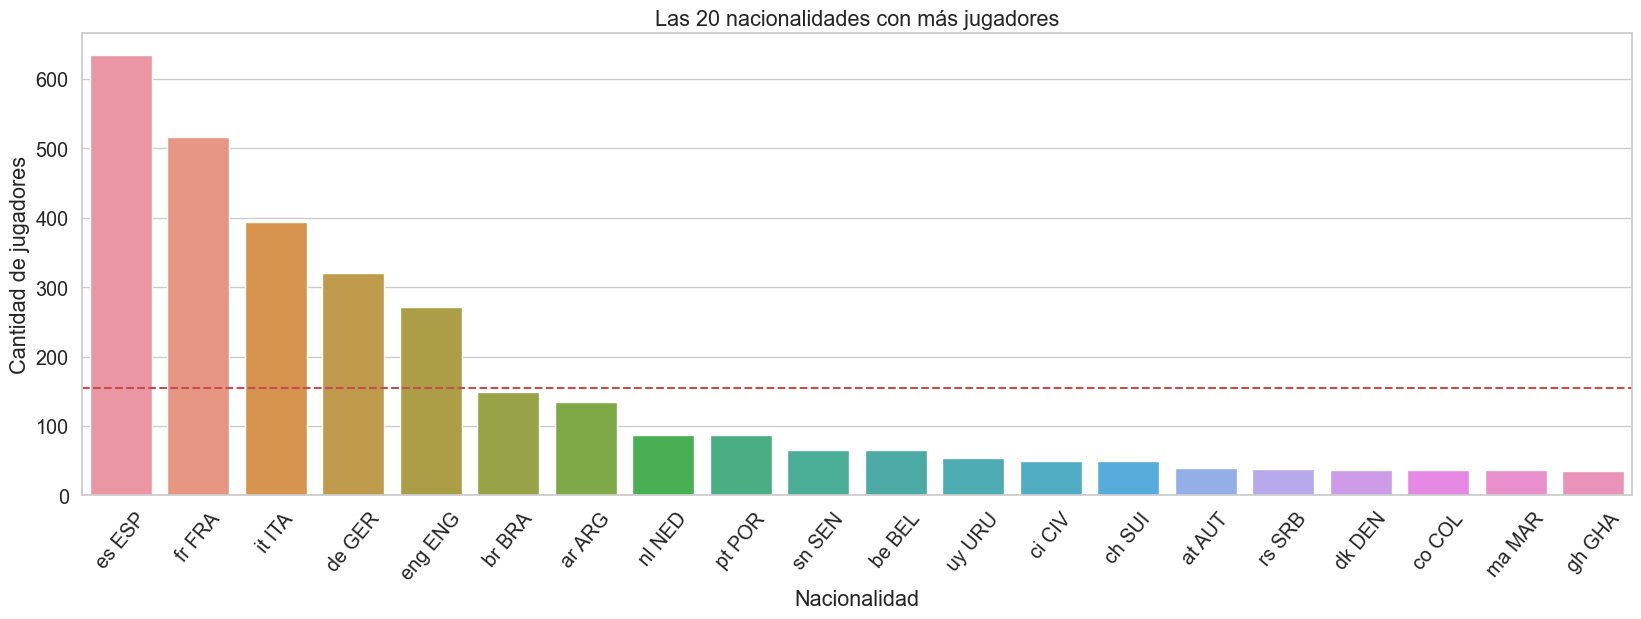

In [14]:
df_count_nationality = df_unique.groupby('nationality').count()['player'].sort_values(ascending=False)[:20]
df_count_nationality = df_count_nationality.reset_index()
df_count_nationality

sns.barplot(data=df_count_nationality, x="nationality", y="player")
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad de jugadores')
plt.title('Las 20 nacionalidades con más jugadores')
plt.xticks(rotation=50)

mean = df_count_nationality['player'].mean()
plt.axhline(y=mean, color='r', linestyle='--', label='Mean')

plt.show()

* Los 5 paises con mas jugadores en las ligas europeas son Espana, Francia, Itali, Alemania y Inglaterra (todos europeos). Y estos tiene mas de 250 jugadores cada uno.
* El resto de paises tienen menos de 150 jugadores cada uno.

## De que nacionalidad son los jugadores que juegan en la 5 grandes ligas de Europa? (por liga)

In [15]:
leagues = ['La Liga', 'Bundesliga', 'Serie A', 'Premier League', 'Ligue 1']

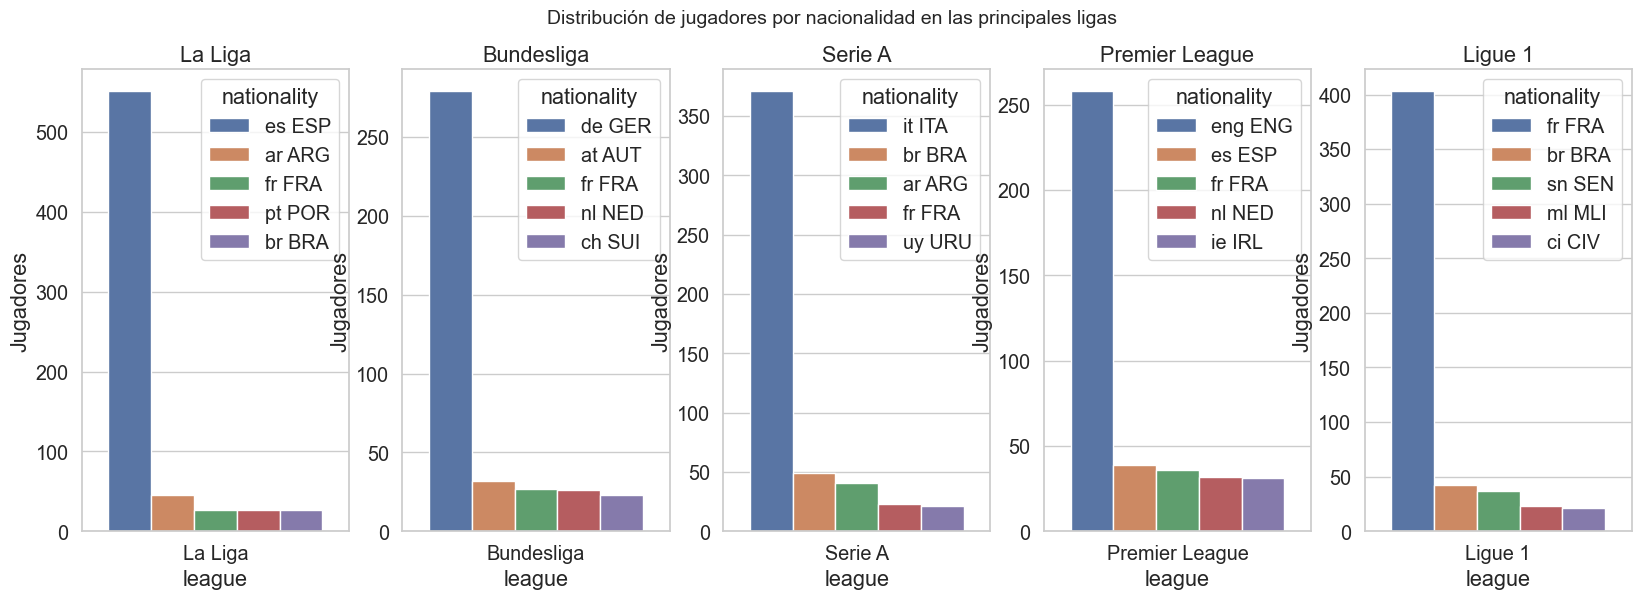

In [16]:
df_count_league_nationality = df_unique.groupby(['league', 'nationality']).count()['player'].reset_index()

fig, ax = plt.subplots(ncols=5)

for indice, league in enumerate(leagues):
    aux = df_count_league_nationality[df_count_league_nationality['league'] == league].sort_values(by='player', ascending=False)[:5]
    sns.barplot(data=aux, x='league', y='player', hue='nationality', ax=ax[indice])
    ax[indice].set_title(league)
    ax[indice].set_ylabel('Jugadores')
    
fig.suptitle('Distribución de jugadores por nacionalidad en las principales ligas', fontsize=14)

plt.show()

* De a cuerdo a la nacionalidad de la liga, es común que la mayoría de los jugadores de esa liga tengan la misma nacionalidad que el país en donde se encuentra dicha liga. Es decir, es común encontrar una alta proporción de jugadores con la nacionalidad del país donde está ubicada la liga.
* La respuesta a la pregunta inicial es NO. El pais con mas jugadores es Espana, pero en la liga alemana, italiana y francesa, no esta ni en los 5 primeros puestos del pais con mas jugadores
  * Si bien espana es el pais con mas jugadores en las ligas, el 80% (a ojo) pertenecen a la liga espanola. Esta logica tambien sucede en las otras ligas.

## Cual es la proporcion de jugadores con la misma nacionalidad de la liga vs los extranjeros por cada una de las ligas?

La idea es analizar cuantos jugadores tienen la misma nacionalidad que la liga y cuantos no, de forma proporcional

In [17]:
nationalities = ['es ESP', 'de GER', 'it ITA', 'eng ENG', 'fr FRA']

/var/folders/6y/lv6pyjl95jbd3mpmx7s3dvrc0000gn/T/ipykernel_7063/3023845509.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_por_nacionalidad = aux.groupby('nationality').sum()['player']
/var/folders/6y/lv6pyjl95jbd3mpmx7s3dvrc0000gn/T/ipykernel_7063/3023845509.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_por_nacionalidad = aux.groupby('nationality').sum()['player']
/var/folders/6y/lv6pyjl95jbd3mpmx7s3dvrc0000gn/T/ipykernel_7063/3023845509.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. 

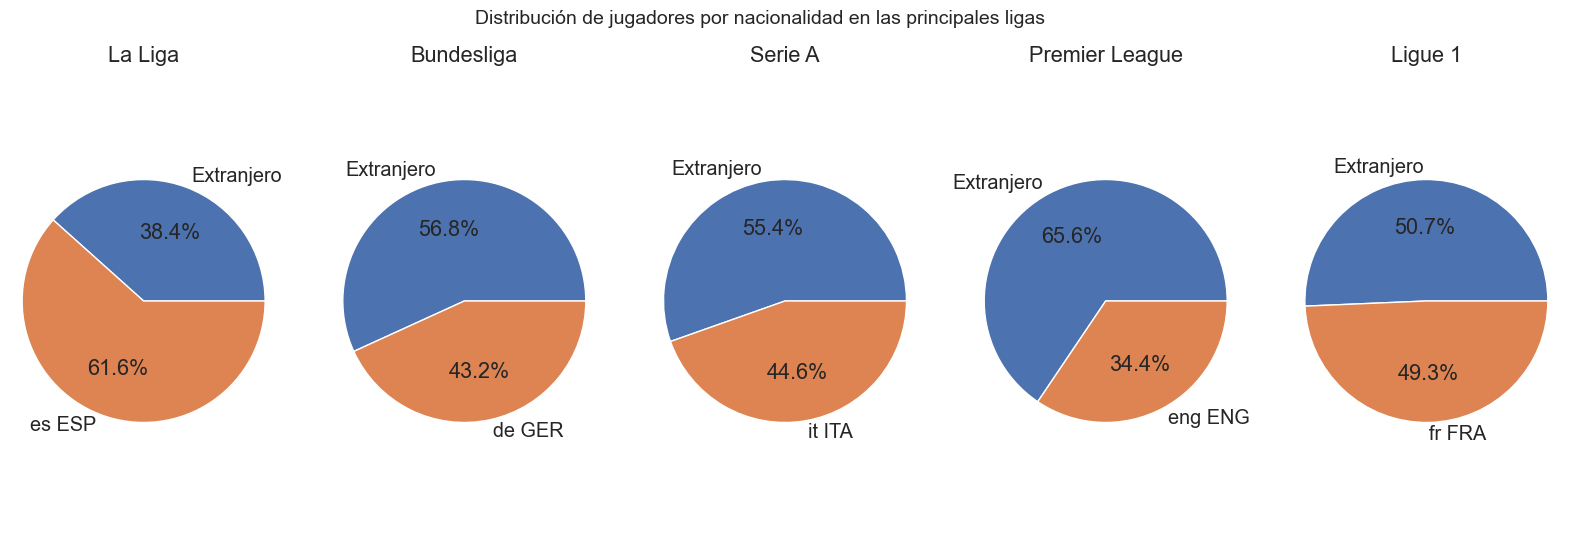

In [18]:
fig, ax = plt.subplots(ncols=5)
fig.suptitle('Distribución de jugadores por nacionalidad en las principales ligas', fontsize=14)

for indice, league in enumerate(leagues):
    df_count_league_nationality
    aux = df_count_league_nationality.copy()
    aux = aux[aux['league'] == league]
    aux.loc[aux['nationality'] != nationalities[indice], 'nationality'] = 'Extranjero'
    datos_por_nacionalidad = aux.groupby('nationality').sum()['player']
    
    ax[indice].pie(datos_por_nacionalidad, labels=datos_por_nacionalidad.index, autopct='%1.1f%%')
    ax[indice].axis('equal')
    ax[indice].set_title(league)

plt.show()

* En los graficos se ve que la unica liga que tiene mas nativos que extranjeros, es la liga espanola. Esto puede estar dado por:
  * Los jugadores espanoles son mejores que los extranjeros.
  * Son mas baratos y rinden bien.
  * Razones culturales.
  * Porque La Liga pone restricciones a la cantidad de jugadores extranjeros (no europeos) que pueden tener un equipo en la plantilla. Este maximo es de 3 por equipo, a estos cupos se los denomina "extracomunitarios", y cualquier jugador que no tenga tenga la nacionalidad de un pais europeo, debera utilizar unos de estos cupas para poder jugar.
    * Aclaracion: Las 5 grandes ligas de europa tienen restricciones similares a las de la liga espanola, a excepcion de La Premier League. Y puede ser una de las razones por la cual es la liga inglesa es la que cuenta con un mayor porcentaje de jugadores extranjeros (que pueden ser europeos o no).

## Cual es la proporcion de jugadores europeos en cada una de las ligas europeas?

Primero se crea una columna que nos diga el continente al que pertenece cada jugador

### Creacion de la columna continent

In [19]:
EUROPA = 'Europe'
AFRICA = 'Africa'
AMERICA_DEL_SUR = 'South America'
OCEANIA = 'Oceania'
ASIA = 'Asia'
AMERICA_CENTRAL = 'Central America'
AMERICA_DEL_NORTE = 'North America'

continentes = {
    'es ESP': EUROPA,
    'fr FRA': EUROPA,
    'se SWE': EUROPA,
    'rs SRB': EUROPA,
    'de GER': EUROPA,
    'sn SEN': AFRICA,
    'py PAR': AMERICA_DEL_SUR,
    've VEN': AMERICA_DEL_SUR,
    'br BRA': AMERICA_DEL_SUR,
    'tg TOG': AFRICA,
    'nc NCL': OCEANIA,
    'ma MAR': AFRICA,
    'cd COD': AFRICA,
    'co COL': AMERICA_DEL_SUR,
    'ci CIV': AFRICA,
    'it ITA': EUROPA,
    'be BEL': EUROPA,
    'la LAO': ASIA,
    'gn GUI': AFRICA,
    'cg CGO': AFRICA,
    'at AUT': EUROPA,
    'nl NED': EUROPA,
    'cm CMR': AFRICA,
    'ga GAB': AFRICA,
    'eng ENG': EUROPA,
    'eg EGY': AFRICA,
    'ng NGA': AFRICA,
    'dk DEN': EUROPA,
    'am ARM': ASIA,
    'wal WAL': EUROPA,
    'cl CHI': AMERICA_DEL_SUR,
    'ch SUI': EUROPA,
    'gm GAM': AFRICA,
    'al ALB': EUROPA,
    'ar ARG': AMERICA_DEL_SUR,
    'uy URU': AMERICA_DEL_SUR,
    'si SVN': EUROPA,
    'gh GHA': AFRICA,
    'pt POR': EUROPA,
    'pl POL': EUROPA,
    'cf CTA': AFRICA,
    'ml MLI': AFRICA,
    'hr CRO': EUROPA,
    'ro ROU': EUROPA,
    'gr GRE': EUROPA,
    'dz ALG': AFRICA,
    'cr CRC': AMERICA_CENTRAL,
    'hu HUN': EUROPA,
    'gw GNB': AFRICA,
    'sco SCO': EUROPA,
    'no NOR': EUROPA,
    'il ISR': ASIA,
    'au AUS': OCEANIA,
    'ie IRL': EUROPA,
    'bm BER': AMERICA_DEL_NORTE,
    'nz NZL': OCEANIA,
    'nir NIR': EUROPA,
    'sk SVK': EUROPA,
    'tr TUR': ASIA,
    'cz CZE': EUROPA,
    'bg BUL': EUROPA,
    'tn TUN': AFRICA,
    'jp JPN': ASIA,
    'us USA': AMERICA_DEL_NORTE,
    'ua UKR': EUROPA,
    'mx MEX': AMERICA_DEL_NORTE,
    'cw CUW': AMERICA_CENTRAL,
    'ao ANG': AFRICA,
    'pe PER': AMERICA_DEL_SUR,
    'mk MKD': EUROPA,
    'ec ECU': AMERICA_DEL_SUR,
    'gq EQG': AFRICA,
    'ke KEN': AFRICA,
    'mq MTQ': AMERICA_DEL_NORTE,
    'xk KVX': EUROPA,
    'bj BEN': AFRICA,
    'ru RUS': EUROPA,
    'bf BFA': AFRICA,
    'mz MOZ': AFRICA,
    'ee EST': EUROPA,
    'mr MTN': AFRICA,
    'sa KSA': ASIA,
    'jm JAM': AMERICA_DEL_NORTE,
    'fi FIN': EUROPA,
    'za RSA': AFRICA,
    'ba BIH': EUROPA,
    'ca CAN': AMERICA_DEL_NORTE,
    'lu LUX': EUROPA,
    'td CHA': AFRICA,
    'ly LBY': AFRICA,
    'gf GUF': AMERICA_DEL_SUR,
    'cv CPV': AFRICA,
    'li LIE': EUROPA,
    'bi BDI': AFRICA,
    'is ISL': EUROPA,
    'mg MAD': AFRICA,
    'ir IRN': ASIA,
    'ph PHI': ASIA,
    'me MNE': EUROPA,
    'ge GEO': ASIA,
    'cy CYP': EUROPA,
    'ne NIG': AFRICA,
    're REU': AFRICA,
    'tt TRI': AMERICA_DEL_SUR,
    'pa PAN': AMERICA_CENTRAL,
    'zw ZIM': AFRICA,
    'tz TAN': AFRICA,
    'kr KOR': ASIA,
    'md MDA': EUROPA,
    'cn CHN': ASIA,
    'lt LTU': EUROPA,
    'zm ZAM': AFRICA,
    'cu CUB': AMERICA_DEL_NORTE,
    'do DOM': AMERICA_DEL_NORTE,
    'bo BOL': AMERICA_DEL_SUR
}

df['continent'] = df['nationality'].map(continentes)

df['continent'].unique()

array(['Europe', 'Africa', 'South America', 'Oceania', 'Asia',
       'Central America', 'North America', nan], dtype=object)

### Grafica y analisis

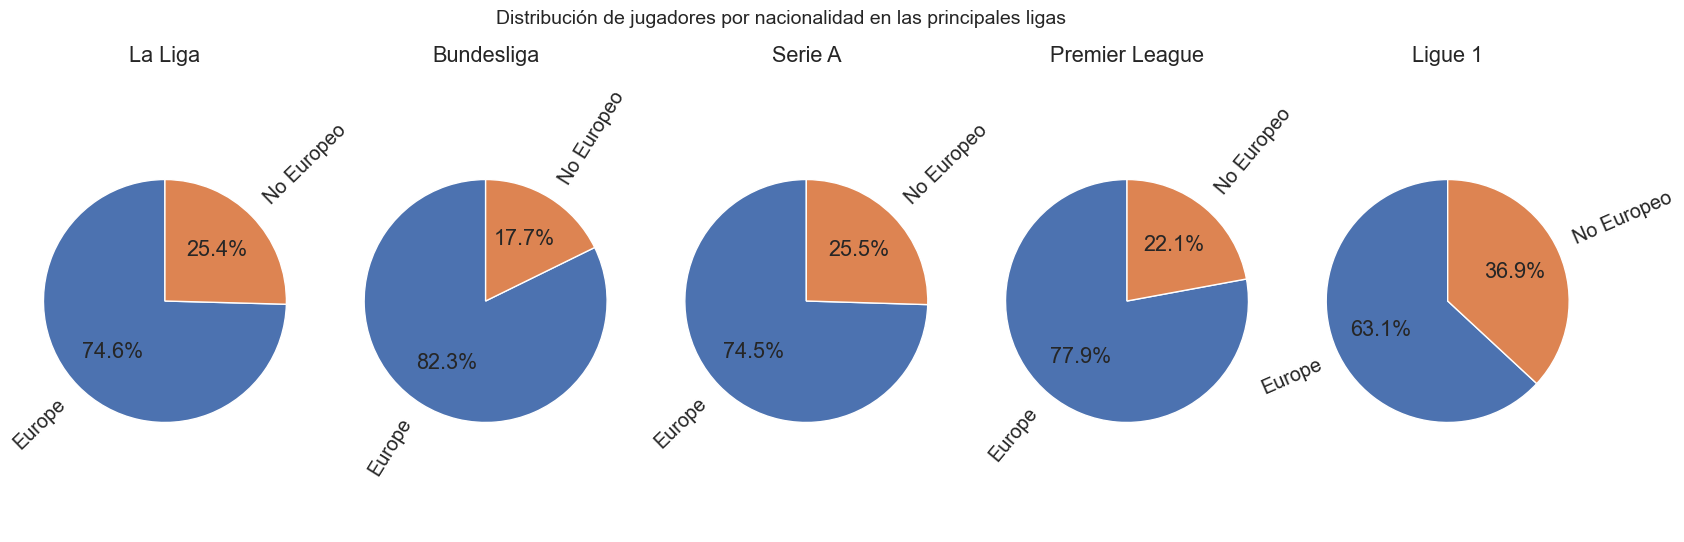

In [20]:
df_count_league_continent = df.groupby(['league', 'continent']).count()['player'].reset_index()
df_count_league_continent.loc[df_count_league_continent['continent'] != EUROPA, 'continent'] = 'No Europeo'
df_count_league_continent = df_count_league_continent.groupby(['league', 'continent']).sum().reset_index()

fig, ax = plt.subplots(ncols=5)
fig.suptitle('Distribución de jugadores por nacionalidad en las principales ligas', fontsize=14)

for indice, league in enumerate(leagues):
    datos_por_continente = df_count_league_continent[df_count_league_continent['league'] == league]
    ax[indice].pie(datos_por_continente['player'], labels=datos_por_continente['continent'], autopct='%1.1f%%', rotatelabels=90, startangle=90)
    ax[indice].axis('equal')
    ax[indice].set_title(league)

plt.show()

* La Premier League si bien no tiene restricciones para jugar con jugadores no europeos y siendo la liga con mas jugadores extranjeros, es el segundo con mas jugadores europeos despues de la liga Alemana. Esto genera la hipotesis de que las restricciones de jugadores no europeos no afecta a la eleccion de jugadores en los equipos ingleses, y quizas, seleccionan jugadores europeos porques:
  * Son mejores
  * Mas baratos
  * O por caracteristicas culturales del pais o especificas del futbol ingles
  * U otras...
* Un dato a destacar sobre la liga inglesa es que el la liga mas copetitiva de europa y ademas la que mas dinero recauda temporada tras temporada (en la temporada 2021-2022 se generaron mas de 6.2 mil millones de dolares, mientras que la segunda fue la liga espanola con 3.5 mil millones de dolares).
* La liga espanola si bien tiene las restricciones mas duras sobre los jugadores no europeos es el cuarto con mas jugadores europeos (no esta entre los primeros). Lo cual hace parecer ilogico lo de las restricciones, ya que cuando no hay restricciones (liga ingles) la mayoria de los jugadores son europeos y cuando hay restriccines (liga espanola) no es el que mas jugadores europeos tiene.
  * Es destacable que los porcentajes de las dos ligas mas importantes de europa tengan casi la misma proporcion de no europeos (25.4 y 22.1).
  * Pareceria ser que las restriccines a los jugadores no europeos no afecta al alrmado de los equipos ingleses ni espanoles o por lo menos no parece que haya una relacion fuerte entre las restricciones y la seleccion de los jugadores en estas dos ligas.

## Como se ve la suma de los valores de mercado de los jugadores en relacion a su liga en la temporada 2019 - 2020?

/var/folders/6y/lv6pyjl95jbd3mpmx7s3dvrc0000gn/T/ipykernel_7063/1733500605.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_values = df_1920.groupby('league').sum()['value'].reset_index()


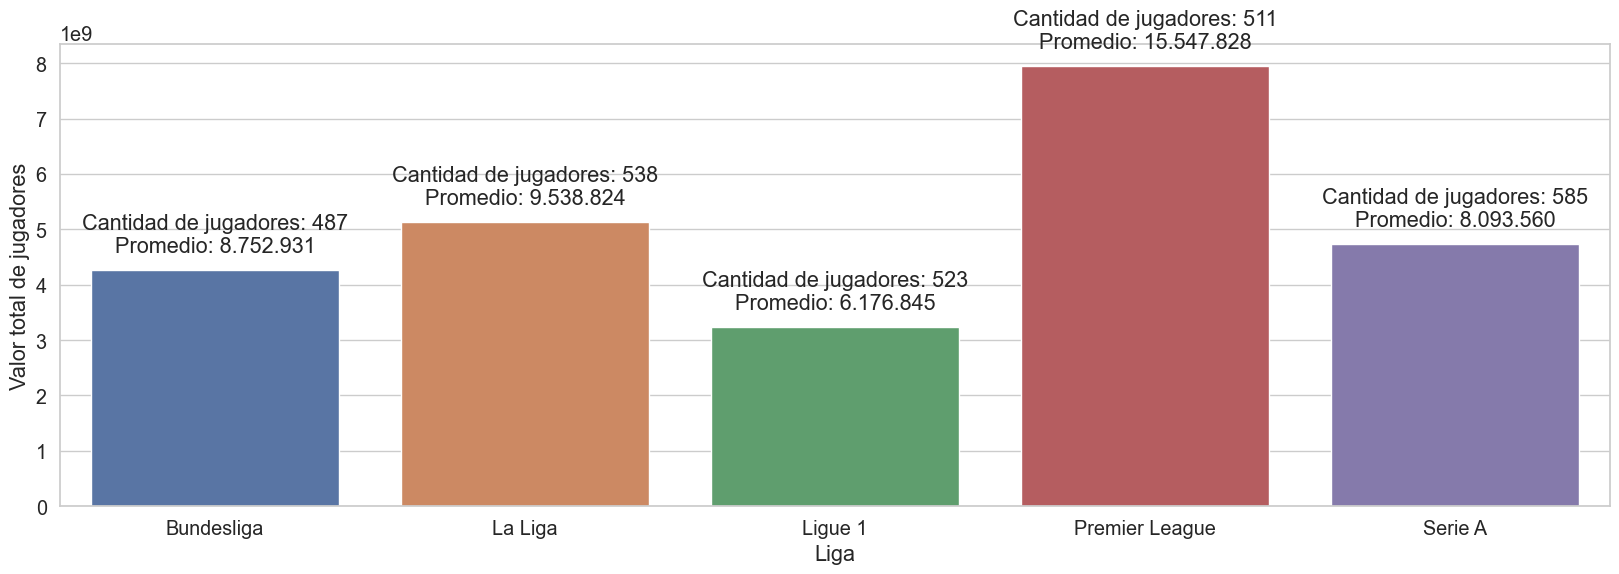

In [21]:
grouped_values = df_1920.groupby('league').sum()['value'].reset_index()

ax = sns.barplot(x='league', y='value', data=grouped_values)

for index, row in grouped_values.iterrows():
    league = row['league']
    value = row['value']
    aux = df_1920[df_1920['league'] == league]
    
    num = int(value / aux.shape[0])
    formatted_num = "{:,}".format(num).replace(",", ".")
    
    ax.annotate(f'Cantidad de jugadores: {str(aux.shape[0])}\nPromedio: {formatted_num}',
                xy=(index, value), xytext=(0, 10),
                textcoords="offset points", ha='center', va='bottom')

ax.set_xlabel('Liga')
ax.set_ylabel('Valor total de jugadores')

plt.show()


* La Premier League sin ser la liga que mas jugadores tiene, es la que mas valor tiene cuando se suma los valores de mercado de sus jugadores
* La Premier tiene un promedio de valor de mercado por jugador mayor a 5000 dolares del segundo.

## La suma de los valores de mercado ha ido en ascenso?

Esto se chequea mediante la suma de los valores de mercado de cada una de las temporada

/var/folders/6y/lv6pyjl95jbd3mpmx7s3dvrc0000gn/T/ipykernel_7063/1224658205.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').sum()['value'].plot(


<Axes: title={'center': 'Valor total de jugadores por año'}, xlabel='Año', ylabel='Valor total de jugadores'>

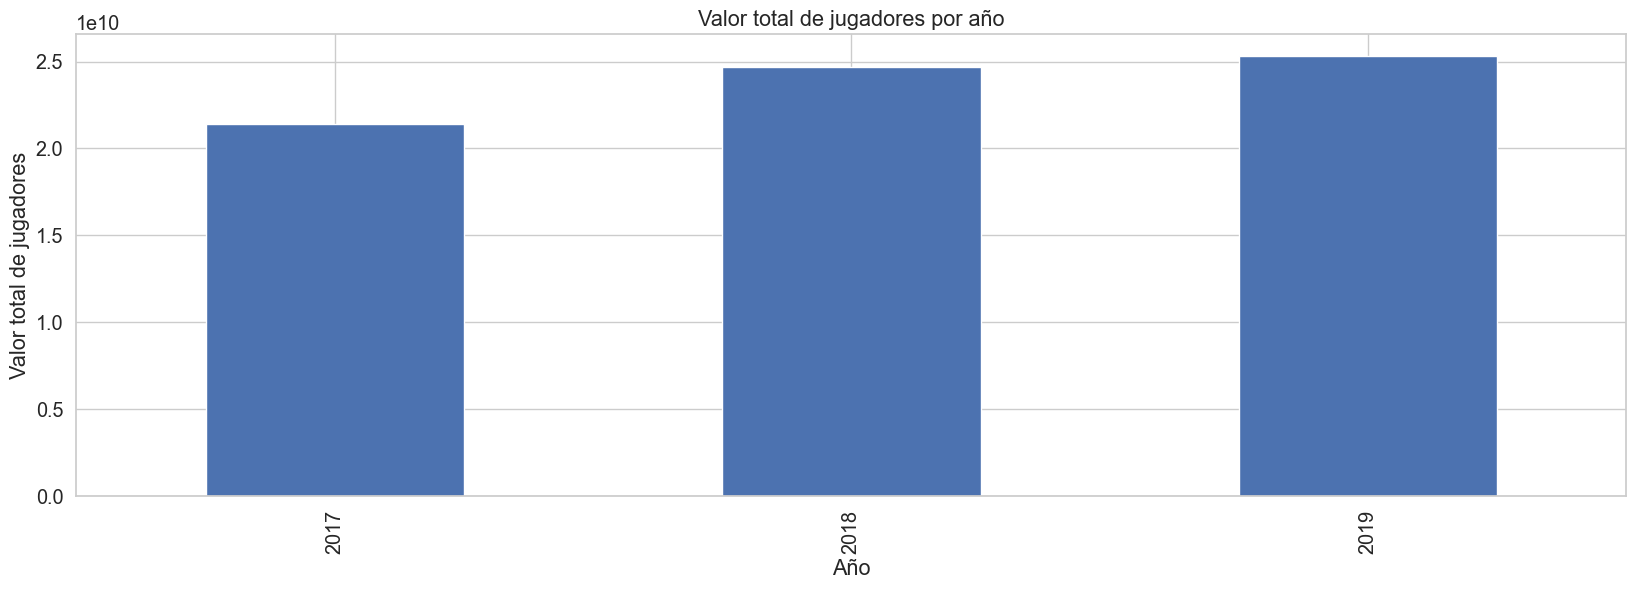

In [22]:
df.groupby('year').sum()['value'].plot(
    kind='bar', 
    xlabel='Año', 
    ylabel='Valor total de jugadores', 
    title='Valor total de jugadores por año'
)

* Se ve un aumento en la sumatoria de los valores de mercado de los jugadores, aunque, al ser solo tres temporadas, lo unico que se puede afirmar es que desde 2017 hasta 2019 la sumatoria de los valores de mercado ha ido en ascenso.

## Como se distribuyen los precios de mercado de los jugadores por liga en la temporada 19-20? Las edades afectan el valor de mercado? 

### Grafica de puntos sobre los precios de mercado de los jugadores en las distintas ligas con su edad

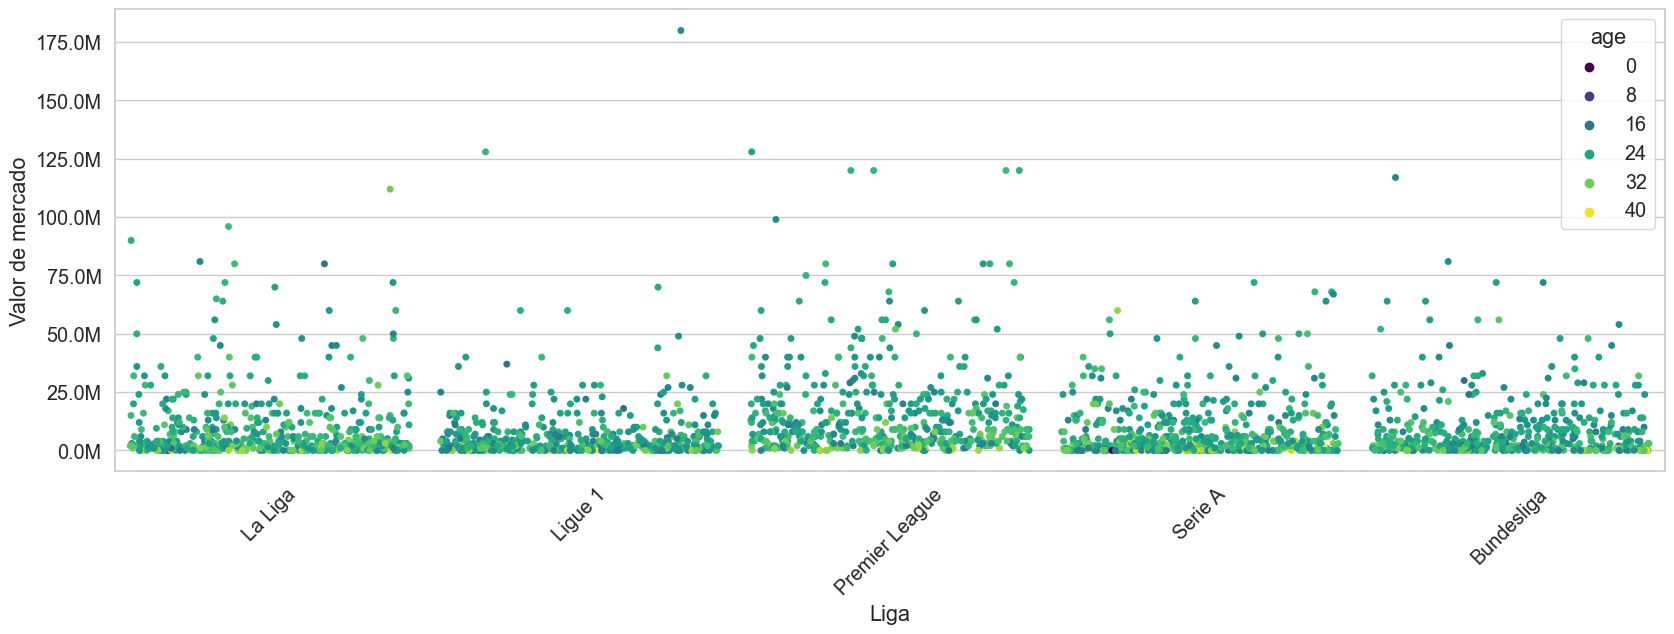

In [23]:
sns.stripplot(x='league', y='value', data=df_1920, jitter=0.45, hue="age", palette="viridis")

plt.xlabel('Liga')
plt.ylabel('Valor de mercado')

plt.xticks(rotation=45)

# Cambia el formato del eje y a millones
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [24]:
league_categories = df_1920['league'].unique()
num_categories = len(league_categories)
category_positions = {league: i+1 for i, league in enumerate(league_categories)}

# Agregar un poco de jitter en la posición de los puntos en el eje x
df_1920['jittered_league'] = df_1920['league'].map(category_positions) + np.random.uniform(-0.45, 0.45, len(df_1920))

max_age = df_1920['age'].max()
min_age = df_1920['age'].min()
# Crear un scatterplot con tres variables y una escala de colores personalizada
fig = px.scatter(df_1920, x="jittered_league", y="value", color="age", hover_name="player",
                 color_continuous_scale='viridis', range_color=[min_age, max_age])

# Personalizar los títulos de los ejes
fig.update_layout(xaxis_title="Liga", yaxis_title="Valor de mercado")

# Personalizar las etiquetas de las marcas en el eje x
fig.update_xaxes(tickvals=list(category_positions.values()), ticktext=list(category_positions.keys()))

fig.show()

* El grafico si bien entrega informacion sobre los precios por liga y la edad de los jugadores, no es bueno para poder comparar entre si.
* Al mismo tiempo nos da una idea de donde esta el grueso de datos y el rango de edad en donde se encuntras (y datos atipicos)

### Grafica de puntos sobre los precios de mercado de los jugadores en las distintas ligas marcando los que tienen más y menos de 30 años 

In [25]:

league_categories = df_1920['league'].unique()
num_categories = len(league_categories)
category_positions = {league: i+1 for i, league in enumerate(league_categories)}

# Agregar un poco de jitter en la posición de los puntos en el eje x
df_1920['jittered_league'] = df_1920['league'].map(category_positions) + np.random.uniform(-0.45, 0.45, len(df_1920))

# Crear una nueva columna para clasificar a los jugadores según su edad
df_1920['age_group'] = np.where(df_1920['age'] > 29, 'Más de 29 años', '29 años o menos')

max_age = df_1920['age'].max()
min_age = df_1920['age'].min()

# Crear un scatterplot con tres variables y una escala de colores personalizada
fig = px.scatter(df_1920, x="jittered_league", y="value", color="age_group", hover_name="player",
                 color_discrete_sequence=["blue", "red"])

# Personalizar los títulos de los ejes
fig.update_layout(xaxis_title="Liga", yaxis_title="Valor de mercado")

# Personalizar las etiquetas de las marcas en el eje x
fig.update_xaxes(tickvals=list(category_positions.values()), ticktext=list(category_positions.keys()))

fig.show()

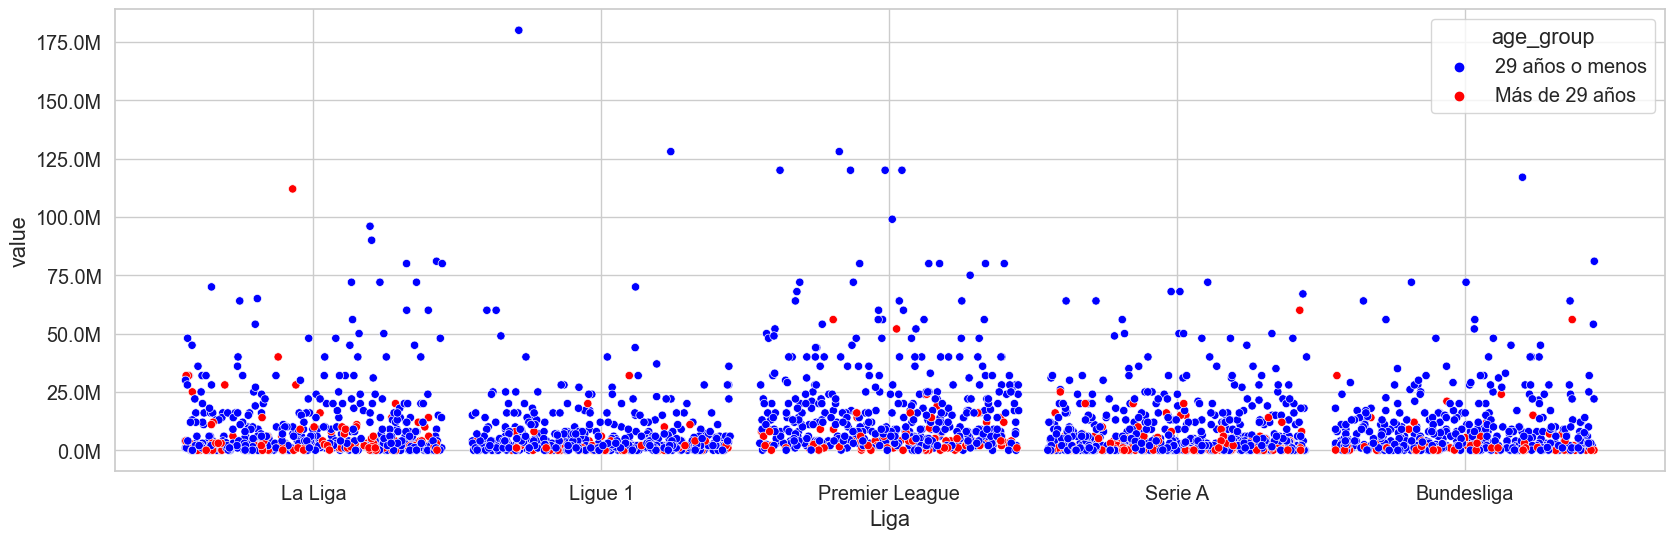

In [26]:
league_categories = df_1920['league'].unique()
num_categories = len(league_categories)
category_positions = {league: i+1 for i, league in enumerate(league_categories)}

# Agregar un poco de jitter en la posición de los puntos en el eje x
df_1920['jittered_league'] = df_1920['league'].map(category_positions) + np.random.uniform(-0.45, 0.45, len(df_1920))

# Crear una nueva columna para clasificar a los jugadores según su edad
df_1920['age_group'] = np.where(df_1920['age'] > 29, 'Más de 29 años', '29 años o menos')

# Crear un scatterplot con tres variables y una escala de colores personalizada
palette = {'Más de 29 años': 'red', '29 años o menos': 'blue'}
fig, ax = plt.subplots()
sns.scatterplot(data=df_1920, x="jittered_league", y="value", hue="age_group", palette=palette)

ax.set_xlabel("Liga")

plt.xticks(ticks=list(category_positions.values()), labels=list(category_positions.keys()))
plt.gca().yaxis.set_major_formatter(formatter)

In [27]:
jugadores_mas_29 = df_1920[df_1920['age'] > 29]
jugadores_menos_30 = df_1920[df_1920['age'] <= 29]

val1 = len(jugadores_mas_29[jugadores_mas_29['value'] >= 50_000_000]) / len(jugadores_mas_29)
val2 = len(jugadores_menos_30[jugadores_menos_30['value'] >= 50_000_000]) / len(jugadores_menos_30)

print(f'Porcentaje de jugadores mayores de 29 años con valor de mercado mayor a 50M: {round(100 * val1, 2)}%')
print(f'Porcentaje de jugadores menores de 30 años con valor de mercado mayor a 50M: {round(100 * val2, 2)}%')

Porcentaje de jugadores mayores de 29 años con valor de mercado mayor a 50M: 1.01%
Porcentaje de jugadores menores de 30 años con valor de mercado mayor a 50M: 3.31%


* En la grafica de puntos es dificil comparar los valores de mercado entre ligas, si bien se nota que los valores de mercado de lo jugadores de la Ligue 1 son mas bajos que las del resto y que la Premier Ligue parece tener jugadores con mas valor de mercado que el resto de ligas, no es lo sufucientemente claro.
* Es dificil encontrar jugadores con mas de 30 años y que tengan un valor de mercado de mas de 50 millones. De todos modos, porcentualmente hablando, el porcentaje de jugadores con menos de 30 años de edad y que tengan un valor de mercado mayor a 50 millones es mas que los que tienen 30 o mas.

### Grafico de caja sobre los precios de mercado de los jugadores en las distintas ligas 

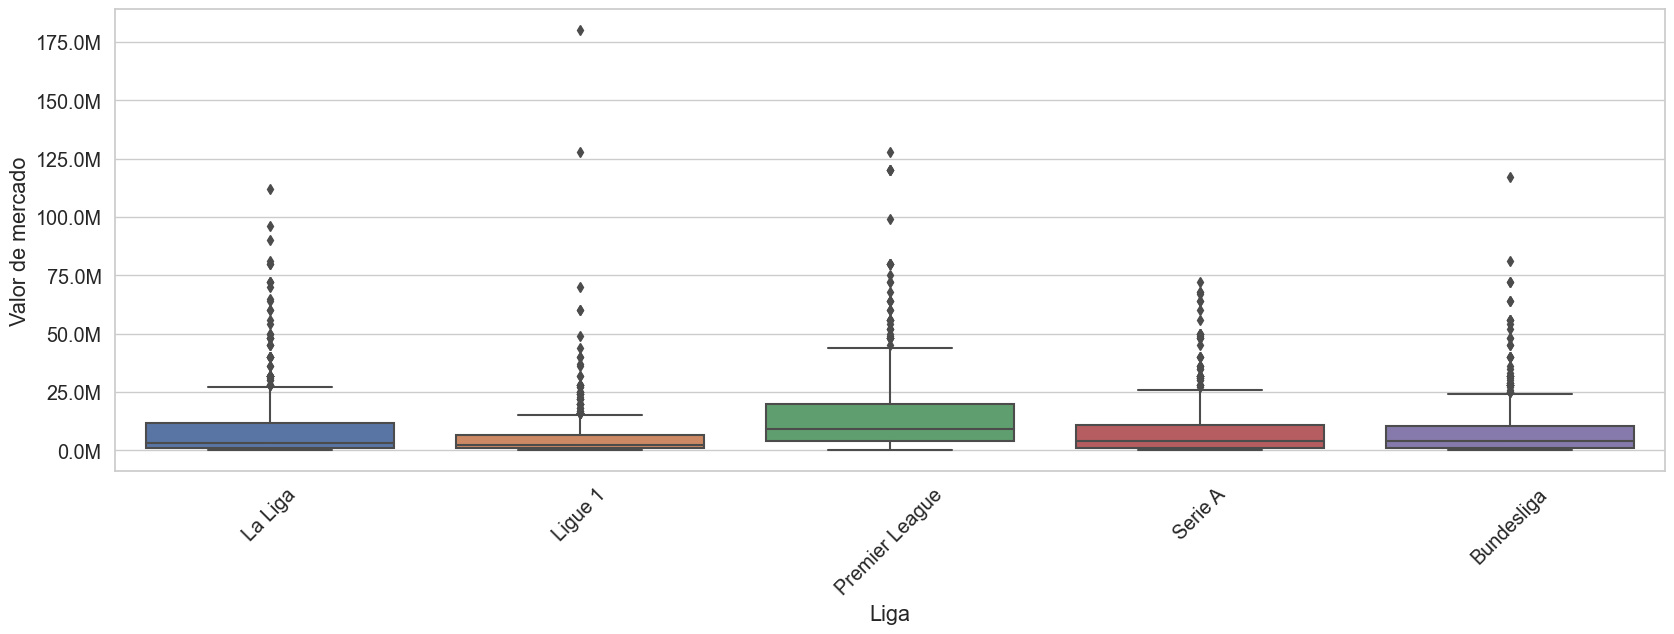

In [28]:
sns.boxplot(x='league', y='value', data=df_1920)
plt.xlabel('Liga')
plt.ylabel('Valor de mercado')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

In [29]:
fig = px.box(df_1920, x="league", y="value", color="league", hover_name="player")
fig.update_layout(xaxis_title="Liga", yaxis_title="Valor de mercado")
fig.show()

* La mediana de la liga inglesa es un poco mas elevada que la del resto, 9 millones. Mientras que la de las otras ligas varian de 2.5 a 4 millones.
* Todos cuentan con una cantidad de atipicos similares.
* Sacando la liga ingles todos tienen medianas similares y tambien tienen un tercer cuartil muy similar excepto la liga francesa. Aunque de todos modos la Ligue 1 es la liga que tiene el jugador con el valor de mercado mas alto (kylian Mbappé).

# Modelos del dataset

## Correlacion del valor de mercado con las otras variables en la temporada 19-20

Seleccion solo de las variables numericas

In [30]:
df_1920_numeric = df_1920.select_dtypes(include='number')

In [31]:
df_1920_numeric.corr()['value'].reset_index().sort_values(by='value', ascending=False).head(10)

,index,value
2,value,1.000000
133,pass_targets,0.519219
88,gca,0.501432
90,gca_passes_live,0.498538
134,passes_received,0.492673
123,touches_att_pen_area,0.489799
375,W,0.488575
381,Pts,0.485694
130,carries,0.484075
20,xa,0.482904


* La variable que mas se relaciona con el valor de mercado de forma positiva es la variable pass_targets (cantidad de intentos de pases).

Se pasa a analizar cuanto de la variabilidad del precio de mercado de jugadores es explicado por la cantidad de intentos de pase.

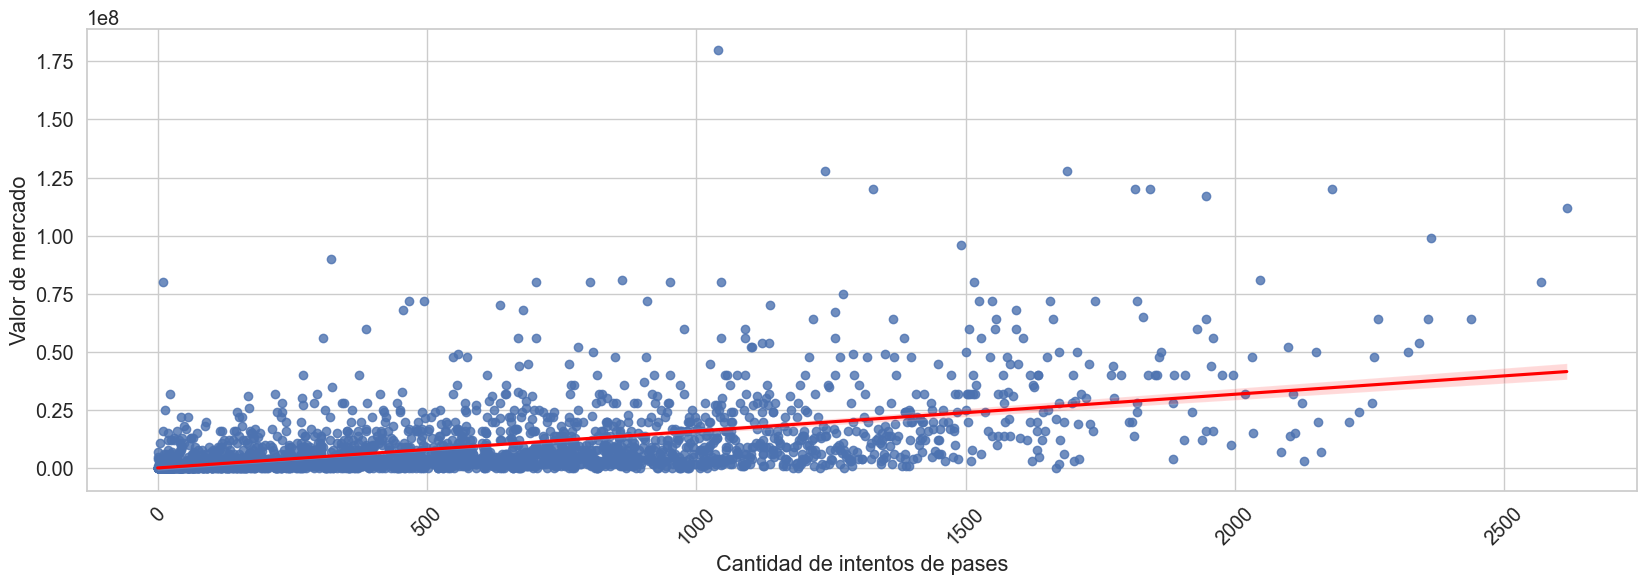

In [32]:
df_test = df_1920[['pass_targets', 'value']]

# sns.scatterplot(x='pass_targets', y='value', data=df_test)
sns.regplot(x='pass_targets', y='value', data=df_test, line_kws={'color': 'red'})

plt.xlabel('Cantidad de intentos de pases')
plt.ylabel('Valor de mercado')

plt.xticks(rotation=45)

plt.show()

In [33]:
# Crea un gráfico de dispersión con la línea de regresión
fig = px.scatter(df_1920, x='pass_targets', y='value', trendline='ols', title='Pass Targets vs. Market Value',  hover_name="player")

# # Configura los ejes y las etiquetas
fig.update_xaxes(title_text='Cantidad de intentos de pases')

# Muestra el gráfico
fig.show()

* El R^2 trazado por la grafica nos da un valor de 0.27, lo cual quire decir que la cantidad de intentos de pases realizados solo explica la variabilidad del 27% de los precios de mercado de los jugadores del dataset. Por lo tanto, debe haber otras variables que hagan variar los precios del mercado de los jugadores.
* Hay posobilidades de que estemos ante un caso de underfitting.

In [34]:
df_1920_numeric.corr()['value'].reset_index().sort_values(by='value', ascending=False).tail(10)

,index,value
254,passes_highm,-0.077265
228,passes_pct_shortm,-0.078133
318,passes_received_pctm,-0.081212
376,D,-0.081382
0,age,-0.108069
384,xGA,-0.239192
379,GA,-0.269020
377,L,-0.373257
373,LgRk,-0.423919
390,year,NaN


* La variable que mas se relaciona con el valor de mercado de forma negativa es la variable LgRk (clasificacion de la liga).
* Este punto parace tener sentido, ya que si la clasificacion de la liga es alta (van mal en el campeonato) el valor de mercado es menor. Mientras que si la clasificacion en la tabla es baja (van bien en el campeonato) el valor de mercado es mayor.
  * Esto quizas este dado por la siguientes causa:
    * Los equipos que estan en los primeros puestos de la liga pueden gastar mucho mas dinero y por esto pueden contratar a jugadores con precios de mercado mas elevados que los que estan en los ultimos puestos.
    * Es logico que cuando un equipo termina una temporada en los mejores puestos de la liga, genera que los precios de los jugadores aummenten, ya que otras clubes quieren hacerse de los servicios de esos jugadores para la proxima temporada.
    * U otras..

* Para checkear la primera hipotesis, se analiza los precios de los jugadores que termminaron en los primeros 5 puestos y en los ultimos 5.
* Para la segunda, es necesaria analizar jugadores que hayan tenido una mala temporada con su club, pero que en la siguiente fué buena.

## Creando un modelo de regresion con todas las variables numericas del dataset para predecir los valores de mercado de los jugadores

In [35]:
df_1920_numeric

,age,birth_year,value,height,games,games_starts,minutes,goals,assists,pens_made,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer,year,jittered_league
Column1,,,,,,,,,,,,,,,,,,,,,
21,23,1996,4000000,178,31,23,2099,1,1,0,...,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0,2019,0.638382
390,22,1997,4000000,188,31,14,1429,1,2,0,...,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0,2019,1.122510
430,25,1994,4000000,183,17,15,1293,0,1,0,...,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0,2019,1.226558
737,23,1995,4000000,172,31,30,2663,0,1,0,...,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0,2019,0.554913
770,25,1993,1000000,188,25,24,2121,2,0,0,...,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0,2019,0.818191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,23,1995,12000000,165,9,3,289,1,0,0,...,1.55,47.1,34.8,12.3,0.32,0,0,NaN,2019,3.204589
2202,29,1990,4000000,188,33,31,2705,2,1,0,...,1.55,47.1,34.8,12.3,0.32,0,0,NaN,2019,2.758127
2523,23,1996,25000000,178,37,27,2605,4,9,0,...,1.55,47.1,34.8,12.3,0.32,0,0,NaN,2019,3.134066


La columna 'CLBestScorer' (fue maximo goleador Champions League, si o no) contiene muchos nulos. Los nulos son correctos ya que los jugadores que tienen un NaN es porque nunca jugaron la Champions League.

Se realiza una inputacion, a todos los jugadores que tengan NaN, se les va a asignar cero.

In [36]:
df_1920_numeric['CLBestScorer'] = df_1920_numeric['CLBestScorer'].fillna(0)
df_1920_numeric.shape

(2644, 392)

Dividinedo train y test

In [37]:
X = df_1920_numeric.drop(['value'], axis=1)
y = df_1920_numeric['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LinearRegression

In [38]:
reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): -0.7438495883124834
Error cuadrático medio (MSE): 459023304168440.94
Error de raíz cuadrada media (RMSE): 21424829.151441112
Error absoluto medio (MAE): 9257226.626001086


* Al parecer un modelo que de un valor negarivo es considerado muy malo (peor que un modelo que solo prediga la media).

### DecisionTreeRegressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): 0.27443347720997513
Error cuadrático medio (MSE): 190986622308049.38
Error de raíz cuadrada media (RMSE): 13819790.96470165
Error absoluto medio (MAE): 7275936.90926276


### RandomForestRegressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): 0.6897732310074456
Error cuadrático medio (MSE): 81659173760658.55
Error de raíz cuadrada media (RMSE): 9036546.561638387
Error absoluto medio (MAE): 5209721.061909263


### SVR

In [41]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='linear')
svr_reg.fit(X_train, y_train)

y_pred = svr_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): 0.3699383816277022
Error cuadrático medio (MSE): 165847426196222.4
Error de raíz cuadrada media (RMSE): 12878176.353669895
Error absoluto medio (MAE): 6525070.172293129


### Ridge

In [42]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): 0.592811074770085
Error cuadrático medio (MSE): 107181953726125.66
Error de raíz cuadrada media (RMSE): 10352871.762275705
Error absoluto medio (MAE): 6877316.0451583145


### Lasso

In [43]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): 0.5509490502217966
Error cuadrático medio (MSE): 118201049040378.39
Error de raíz cuadrada media (RMSE): 10872030.584963344
Error absoluto medio (MAE): 7291311.48918469


/Users/santiagoducos/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.483e+16, tolerance: 4.476e+13



### ElasticNet

In [44]:
from sklearn.linear_model import ElasticNet

elastic_net_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_reg.fit(X_train, y_train)

y_pred = elastic_net_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): 0.6027800428391497
Error cuadrático medio (MSE): 104557880702350.77
Error de raíz cuadrada media (RMSE): 10225354.795915434
Error absoluto medio (MAE): 6481944.930116325


/Users/santiagoducos/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.542e+16, tolerance: 4.476e+13



## Feature Selection

In [45]:
%pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 711.9 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(LinearRegression(), k_features=10, forward=True, scoring='r2', cv=5)

sfs.fit(X, y)

columns = list(sfs.k_feature_names_)

In [47]:
columns

['age',
 'goals',
 'pens_att',
 'shots_on_target',
 'crosses_into_penalty_area',
 'through_balls',
 'pass_targets',
 'aerials_lost',
 'clean_sheets',
 'W']

In [48]:
X_2 = df_1920_numeric.loc[:, columns]

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=42)

### LinearRegression con Forward selection

In [49]:
reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): 0.6109044458349144
Error cuadrático medio (MSE): 102419341729433.5
Error de raíz cuadrada media (RMSE): 10120244.153647356
Error absoluto medio (MAE): 6466219.972075125


#### Aclaraciones:

Tanto el RMSE y el MAE nos da informacion sobre las preddiciones errones del modelo ya que comparan el valor predicho con el real. La diferencia es que el RMSE penaliza mas a los errores grandes en comparacion con el MAE. Por lo tanto si no hay errores grandes el RMSE es igual al MAE.Eso si, ninguno de los dos estadisticos ofrece detalles especificos de los datos, son metricas de resumen que proporcionan informacion sobre el rendimiento del modelo.

#### Conclusiones:

La mejora del modelo es contundente, de pasar de un valor negativo a explicar el 61% de la variabilidad de los datos (hay un 39% que no es explicado por el modelo).



* El RMSE de alrededor de 10 millones indica que, en promedio, las predicciones erróneas del modelo se desvían de los precios reales de los jugadores en alrededor de 10 millones de dólares.
  * Este valor es elevado y podría ser problemático si un club europeo usa el modelo para tomar decisiones de compra de jugadores en las 5 grandes ligas de Europa. Un error tan grande en las estimaciones de los precios de los jugadores podría llevar al club a pagar de más por un jugador o, por el contrario, a ofrecer menos de lo que vale un jugador, lo que podría resultar en que el club dueño del jugador no esté dispuesto a venderlo.
  ***
* El MAE tiene un valor de 6.4 millones de dolares, y si los comparamos con los 10.4 millones de RMSE, esto quiere decir que hay errores grandes en las predicciones del modelo
  *  Si la mayoría de los errores en las predicciones fueran pequeños y de magnitudes similares, el MAE y el RMSE estarían más cerca uno del otro. La diferencia significativa entre el MAE y el RMSE sugiere que existen algunos errores bastante grandes que están afectando el RMSE.

Teniendo en cuenta estas limitaciones, sería aconsejable buscar formas de mejorar la precisión del modelo, ya sea probando otros modelos, seleccionando características diferentes o utilizando técnicas de validación cruzada para optimizar los hiperparámetros del modelo.

Corremos los otros modelos para ver los resultados

### DecisionTreeRegressor con Forward selection

In [50]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): 0.48779561199902566
Error cuadrático medio (MSE): 134824558359588.84
Error de raíz cuadrada media (RMSE): 11611397.778027797
Error absoluto medio (MAE): 6761517.86389414


### RandomForestRegressor con Forward selection

In [51]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): 0.6746501562487945
Error cuadrático medio (MSE): 85639932073432.53
Error de raíz cuadrada media (RMSE): 9254184.570962075
Error absoluto medio (MAE): 5326737.371928167


### SVR con Forward selection

In [53]:
svr_reg = SVR(kernel='linear')
svr_reg.fit(X_train, y_train)

y_pred = svr_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): 0.21336883380565674
Error cuadrático medio (MSE): 207060310412332.72
Error de raíz cuadrada media (RMSE): 14389590.349010382
Error absoluto medio (MAE): 7237388.98136398


### Ridge con Forward selection

In [54]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): 0.6108982142338245
Error cuadrático medio (MSE): 102420982037256.9
Error de raíz cuadrada media (RMSE): 10120325.194244348
Error absoluto medio (MAE): 6466121.26636954


### Lasso con Forward selection

In [55]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): 0.6109044388601546
Error cuadrático medio (MSE): 102419343565358.64
Error de raíz cuadrada media (RMSE): 10120244.244352931
Error absoluto medio (MAE): 6466219.75338355


### ElasticNet con Forward selection

In [56]:
elastic_net_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_reg.fit(X_train, y_train)

y_pred = elastic_net_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R²): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

print(f"Error de raíz cuadrada media (RMSE): {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

Coeficiente de determinación (R²): 0.6060945499508719
Error cuadrático medio (MSE): 103685422425955.02
Error de raíz cuadrada media (RMSE): 10182603.911866307
Error absoluto medio (MAE): 6397354.688497641


#### Conclusiones:

No hubo grandes mejoras en comparacion con los modelos anteriores de cada uno, es mas, alguno empeoró.